# Evaluation Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import wrangling
import modeling

import warnings
warnings.filterwarnings("ignore")

Load your zillow dataset.

In [2]:
df = wrangling.get_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,square_ft,tax_value,built,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [59]:
train, validate, test = wrangling.subset_df(wrangling.get_zillow())

In [5]:
train, validate, test = wrangling.subset_df(df)
train.shape, validate.shape, test.shape

((1284141, 7), (428047, 7), (428047, 7))

In [63]:
baseline = round(train['tax_value'].mean(),2)
baseline

460673.52

In [137]:
train = train[['square_ft', 'tax_value']]

In [138]:
train['baseline_preds'] = baseline

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:

```python
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
```
Modify and add to the code above as necessary for it to work with the zillow dataset.



In [139]:
train.head()

,square_ft,tax_value,baseline_preds
53357,1923,196403,460673.52
1933579,1662,63120,460673.52
1884570,1200,285762,460673.52
1664586,1934,138403,460673.52
1022238,1546,178282,460673.52


In [66]:
ols_model = LinearRegression()

In [67]:
ols_model.fit(train[['square_ft']], train[['tax_value']])

LinearRegression()

In [140]:
train['yhat'] = ols_model.predict(train[['square_ft']])

In [142]:
train['residuals'] = train.yhat - train.tax_value

In [143]:
train.head()

,square_ft,tax_value,baseline_preds,yhat,residuals
53357,1923,196403,460673.52,473750.168320,277347.168320
1933579,1662,63120,460673.52,417129.975382,354009.975382
1884570,1200,285762,460673.52,316905.725814,31143.725814
1664586,1934,138403,460673.52,476136.459976,337733.459976
1022238,1546,178282,460673.52,391965.445187,213683.445187


Plot the residuals for the linear regression model that you made.



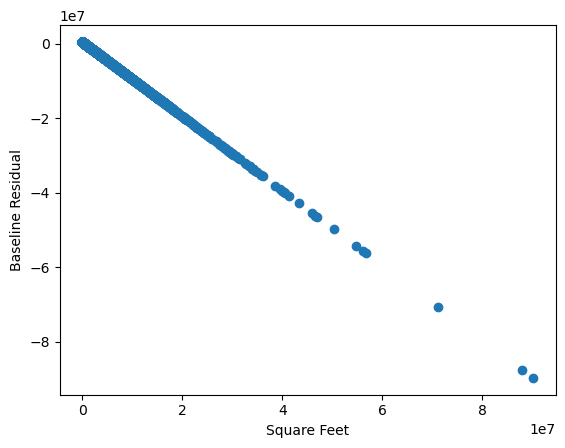

In [14]:
plt.scatter(train['tax_value'], train['baseline_residuals'])
plt.xlabel('Square Feet')
plt.ylabel('Baseline Residual')
plt.show()

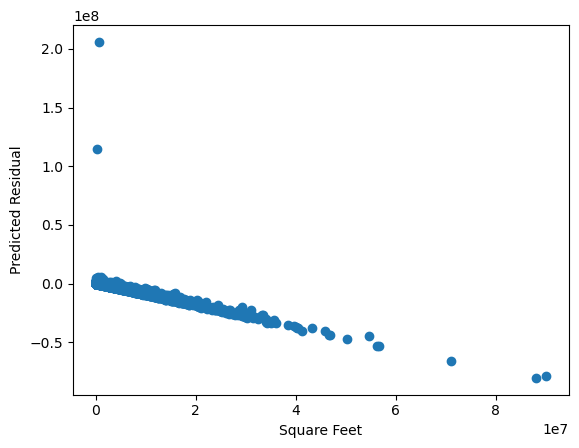

In [15]:
plt.scatter(preds['tax_value'], preds['yhat_residuals'])
plt.xlabel('Square Feet')
plt.ylabel('Predicted Residual')
plt.show()

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



### SSE

In [146]:
sse = (train['residuals'] ** 2).sum()
sse

4.829883000818784e+17

In [17]:
sse_baseline = mean_squared_error(preds['tax_value'], preds['baseline_preds'])*len(preds)
sse_yhat = mean_squared_error(preds['tax_value'], preds['yhat'])*len(preds)

sse_baseline, sse_yhat

(5.952576092982139e+17, 4.8298830008187846e+17)

### MSE

In [18]:
mse_baseline = mean_squared_error(preds['tax_value'], preds['baseline_preds'])
mse_yhat = mean_squared_error(preds['tax_value'], preds['yhat'])

mse_baseline, mse_yhat

(463545365577.6226, 376117809556.64404)

### RMSE

In [19]:
rmse_baseline = sqrt(mean_squared_error(preds['tax_value'], preds['baseline_preds']))
rmse_yhat = sqrt(mean_squared_error(preds['tax_value'], preds['yhat']))

rmse_baseline, rmse_yhat

(680841.6596960138, 613284.4442480537)

### ESS 

In [20]:
preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
preds.head()

,square_ft,tax_value,baseline_preds,yhat,baseline_residuals,yhat_residuals,baseline_res_squared,yhat_res_squared,yhat_mean_res
53357,1923,196403,460673.52,473750.168320,264270.52,277347.168320,6.983891e+10,7.692145e+10,13076.648320
1933579,1662,63120,460673.52,417129.975382,397553.52,354009.975382,1.580488e+11,1.253231e+11,-43543.544618
1884570,1200,285762,460673.52,316905.725814,174911.52,31143.725814,3.059404e+10,9.699317e+08,-143767.794186
1664586,1934,138403,460673.52,476136.459976,322270.52,337733.459976,1.038583e+11,1.140639e+11,15462.939976
1022238,1546,178282,460673.52,391965.445187,282391.52,213683.445187,7.974497e+10,4.566061e+10,-68708.074813


In [21]:
preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
ess_baseline = 0
ess_yhat = preds['yhat_mean_res_squared'].sum()
ess_yhat

1.1226930921639934e+17

### TSS

In [22]:
tss_baseline = sse_baseline + ess_baseline
tss_yhat = sse_yhat + ess_yhat

tss_baseline, tss_yhat

(5.952576092982139e+17, 5.952576092982778e+17)

In [23]:
ess_yhat / tss_yhat

0.18860625628750644

In [24]:
sse_baseline, ess_baseline, tss_baseline, mse_baseline, rmse_baseline

(5.952576092982139e+17,
 0,
 5.952576092982139e+17,
 463545365577.6226,
 680841.6596960138)

In [25]:
explained_variance_score(preds['tax_value'], preds['yhat'])

0.18860625628741956

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).



In [26]:
sse_yhat, ess_yhat, tss_yhat, mse_yhat, rmse_yhat

(4.8298830008187846e+17,
 1.1226930921639934e+17,
 5.952576092982778e+17,
 376117809556.64404,
 613284.4442480537)

In [27]:
explained_variance_score(preds['tax_value'], preds['baseline_preds'])

0.0

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [35]:
if sse_yhat > sse_baseline:
    
    print('Model did not outperform my baseline predicitons')
    
else:
    
    print('Model outperformed my baseline predictions')

Model outperformed my baseline predictions


What is the amount of variance explained in your model?



In [29]:
preds_variance = round(explained_variance_score(preds['tax_value'], preds['yhat']), 2)

In [30]:
print(f'The variance in my model is: {preds_variance}')

The variance in my model is: 0.19


Is your model better than the baseline model?



- Yes. It's not amazing, but it did outperform the baseline predictions

Create a file named evaluate.py that contains the following functions.

`plot_residuals(y, yhat)`: creates a residual plot  
`regression_errors(y, yhat)`: returns the following values:

- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)  

`baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model  
`better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false

In [55]:
def plot_residuals(train, target, yhat):
        
        sns.regplot(data = train.sample(10000), x = target, y = yhat)
        plt.xlabel('Tax Value')
        plt.ylabel('Prediction')
        plt.legend()
        plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


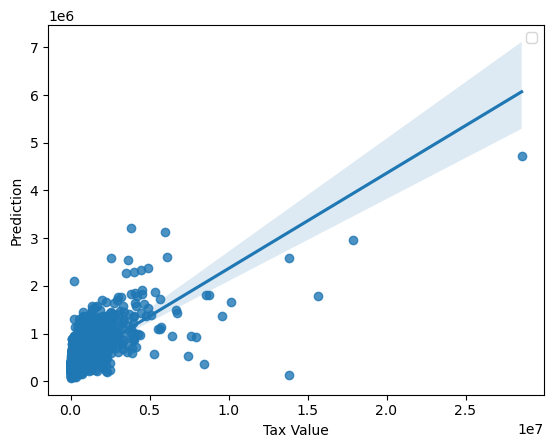

In [56]:
plot_residuals(preds, 'tax_value', 'yhat')

In [104]:
def regression_errors(preds, target, yhat):
    
    seed = 42

    preds['baseline_residuals'] = preds['baseline_preds'] - preds[target]
    preds['yhat_residuals'] = preds[yhat] - preds[target]
    
    preds['baseline_res_squared'] = preds['baseline_residuals'] ** 2
    preds['yhat_res_squared'] = preds['yhat_residuals'] ** 2
        
    preds['yhat_mean_res'] = preds[yhat] - preds['baseline_preds']
    preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
    
    sse_yhat = mean_squared_error(preds[target], preds[yhat])*len(preds)
    ess_yhat = preds['yhat_mean_res_squared'].sum()
    tss_yhat = sse_yhat + ess_yhat
    mse_yhat = mean_squared_error(preds[target], preds[yhat])
    rmse_yhat = sqrt(mean_squared_error(preds[target], preds[yhat]))
    
    var_score = explained_variance_score(preds[target], preds[yhat])
    
    eval_metrics = pd.DataFrame(np.array(['sse','ess','tss', 'mse', 'rmse', 'var_score']), columns=['metric'])
    eval_metrics['model_values'] = [sse_yhat, ess_yhat, tss_yhat, mse_yhat, rmse_yhat, var_score]

    return preds, eval_metrics

In [105]:
preds, eval_metrics = regression_errors(preds, 'tax_value', 'yhat')

In [106]:
preds

,square_ft,tax_value,baseline_preds,yhat,baseline_residuals,yhat_residuals,baseline_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
53357,1923,196403,460673.52,473750.168320,264270.52,277347.168320,6.983891e+10,7.692145e+10,13076.648320,1.709987e+08
1933579,1662,63120,460673.52,417129.975382,397553.52,354009.975382,1.580488e+11,1.253231e+11,-43543.544618,1.896040e+09
1884570,1200,285762,460673.52,316905.725814,174911.52,31143.725814,3.059404e+10,9.699317e+08,-143767.794186,2.066918e+10
1664586,1934,138403,460673.52,476136.459976,322270.52,337733.459976,1.038583e+11,1.140639e+11,15462.939976,2.391025e+08
1022238,1546,178282,460673.52,391965.445187,282391.52,213683.445187,7.974497e+10,4.566061e+10,-68708.074813,4.720800e+09
...,...,...,...,...,...,...,...,...,...,...
2003274,1281,297096,460673.52,334477.509829,163577.52,37381.509829,2.675761e+10,1.397377e+09,-126196.010171,1.592543e+10
1570006,1630,179979,460673.52,410188.036018,280694.52,230209.036018,7.878941e+10,5.299620e+10,-50485.483982,2.548784e+09
732180,1517,735768,460673.52,385674.312639,-275094.48,-350093.687361,7.567697e+10,1.225656e+11,-74999.207361,5.624881e+09
110268,1390,788601,460673.52,358123.490788,-327927.48,-430477.509212,1.075364e+11,1.853109e+11,-102550.029212,1.051651e+10


In [107]:
eval_metrics

,metric,model_values
0,sse,4.829883e+17
1,ess,1.122693e+17
2,tss,5.952576e+17
3,mse,3.761178e+11
4,rmse,6.132844e+05
5,var_score,1.886063e-01


In [123]:
def baseline_mean_errors(preds, target, baseline):
    
    seed = 42

    preds['baseline_residuals'] = preds['baseline_preds'] - preds[target]
    preds['yhat_residuals'] = preds['yhat'] - preds[target]
    
    preds['baseline_res_squared'] = preds['baseline_residuals'] ** 2
    preds['yhat_res_squared'] = preds['yhat_residuals'] ** 2
        
    preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
    preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
    
    ess_baseline = 0
    sse_baseline = mean_squared_error(preds[target], preds['baseline_preds'])*len(preds)
    tss_baseline = sse_baseline + ess_baseline    
    mse_baseline = mean_squared_error(preds[target], preds['baseline_preds'])    
    rmse_baseline = sqrt(mean_squared_error(preds[target], preds['baseline_preds']))
    
    eval_metrics = pd.DataFrame(np.array(['sse','ess','tss', 'mse', 'rmse']), columns=['metric'])
    eval_metrics['model_values'] = [sse_baseline, ess_baseline, tss_baseline, 
                                    mse_baseline, rmse_baseline]

    return preds, eval_metrics

In [125]:
preds, eval_metrics = baseline_mean_errors(preds, 'tax_value', 'baseline')

In [128]:
preds

,square_ft,tax_value,baseline_preds,yhat,baseline_residuals,yhat_residuals,baseline_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
53357,1923,196403,460673.52,473750.168320,264270.52,277347.168320,6.983891e+10,7.692145e+10,13076.648320,1.709987e+08
1933579,1662,63120,460673.52,417129.975382,397553.52,354009.975382,1.580488e+11,1.253231e+11,-43543.544618,1.896040e+09
1884570,1200,285762,460673.52,316905.725814,174911.52,31143.725814,3.059404e+10,9.699317e+08,-143767.794186,2.066918e+10
1664586,1934,138403,460673.52,476136.459976,322270.52,337733.459976,1.038583e+11,1.140639e+11,15462.939976,2.391025e+08
1022238,1546,178282,460673.52,391965.445187,282391.52,213683.445187,7.974497e+10,4.566061e+10,-68708.074813,4.720800e+09
...,...,...,...,...,...,...,...,...,...,...
2003274,1281,297096,460673.52,334477.509829,163577.52,37381.509829,2.675761e+10,1.397377e+09,-126196.010171,1.592543e+10
1570006,1630,179979,460673.52,410188.036018,280694.52,230209.036018,7.878941e+10,5.299620e+10,-50485.483982,2.548784e+09
732180,1517,735768,460673.52,385674.312639,-275094.48,-350093.687361,7.567697e+10,1.225656e+11,-74999.207361,5.624881e+09
110268,1390,788601,460673.52,358123.490788,-327927.48,-430477.509212,1.075364e+11,1.853109e+11,-102550.029212,1.051651e+10


In [129]:
eval_metrics

,metric,model_values
0,sse,5.952576e+17
1,ess,0.000000e+00
2,tss,5.952576e+17
3,mse,4.635454e+11
4,rmse,6.808417e+05


In [147]:
def better_than_baseline(y, yhat):

    sse, ess, tss, mse, rmse = regression_errors(y, yhat)
    
    sse_baseline, mse_baseline, rmse_baseline = baseline_mean_errors(y)
    
    if sse < sse_baseline:
        print('My model performs better than baseline')
    else:
        print('My model performs worse than baseline')

### Class review

- Residuals = yhat - y

- SSE (for predictions) = (train.residuals ** 2).sum()

- ESS = ((train.yhat - train.tax_value.mean()) ** 2).sum()

- TSS = ESS + SSE

- MSE (for predictions) = 
    - SSE/len(train.yhat)
    - mean_squared_error(train.tax_value, train.yhat)
    
- RMSE (for predictions)  = 
    - MSE ** .5
    - math.sqrt(MSE)
    
- Baseline = train['baseline'] = train.tax_value.mean()

- MSE (for baseline) = mean_squared_error(train.tax_value, train.baseline)
      
- SSE (for baseline) = MSE_baseline * len(train)

- RMSE (for baseline) = MSE_baseline ** .5

- Variance = 
    - ESS / TSS
    - r2_score(train.tax_value, train.yhat
    - explained_variance_score(train.tax_value, train.yhat)

In [130]:
def plot_residuals(y, yhat):
    '''
    This function takes in the actual value and predicted value 
    then creates a scatter plot of those values
    '''
    
    residuals = y - yhat
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

In [135]:
def regression_errors(y, yhat):
    '''
    This function takes in the actual value and predicted value 
    then outputs: the sse, ess, tss, mse, and rmse
    '''
    
    mse = mean_squared_error(y, yhat)
    sse = mse * len(y)
    rmse = math.sqrt(mse)
    ess = ((yhat - y.mean())**2).sum()
    tss = ess + sse
    
    return mse, sse, rmse, ess, tss

In [ ]:
def regression_errors_print(y, yhat):
    '''
    This function takes in the actual value and predicted value 
    then outputs: the sse, ess, tss, mse, and rmse
    '''
    
    mse = mean_squared_error(y, yhat)
    sse = mse * len(y)
    rmse = math.sqrt(mse)
    ess = ((yhat - y.mean())**2).sum()
    tss = ess + sse
        
    print(f''' 
        SSE: {sse: .4f}
        ESS: {ess: .4f}
        TSS: {tss: .4f}
        MSE: {mse: .4f}
        RMSE: {rmse: .4f}
        ''')

In [ ]:
def baseline_mean_errors(y):
    
    baseline = np.repeat(y.mean(), len(y))
    
    mse = mean_squared_error(y, baseline)
    sse = mse * len(y)
    rmse = mse ** .5
    
    return mse, sse, rmse